In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [2]:
breast_img = glob.glob('./Breast-Canser/IDC_regular_ps50_idx5/**/*.png', recursive = True)

for imgname in breast_img[:3]:
    print(imgname)

./Breast-Canser/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
./Breast-Canser/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
./Breast-Canser/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png


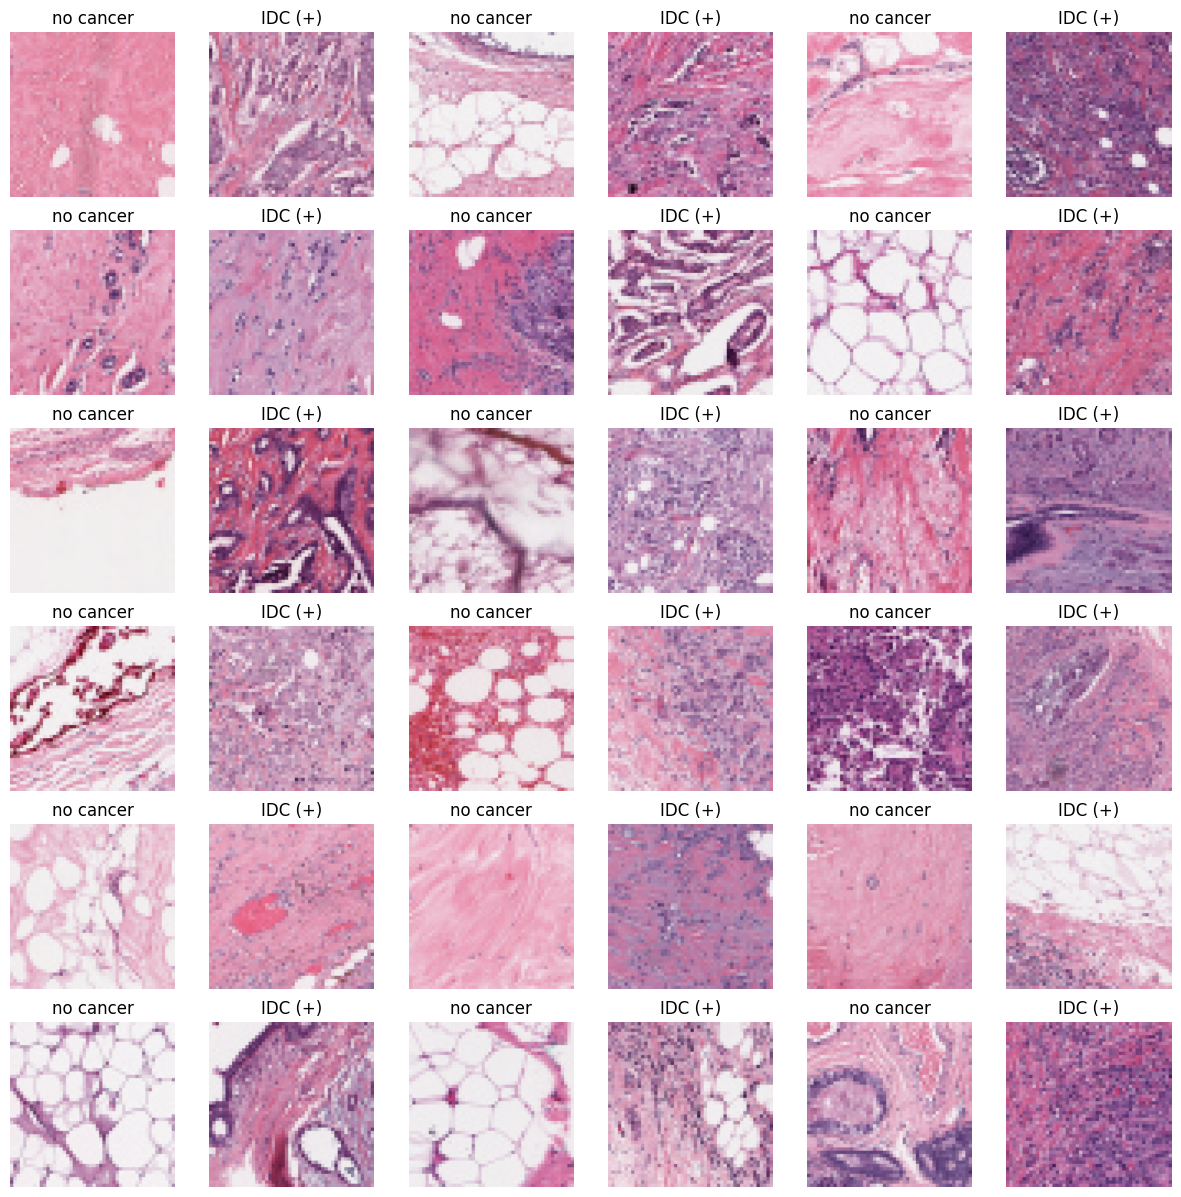

In [3]:
N_IDC = []
P_IDC = []

for img in breast_img:
    if img[-5] == '0' :
        N_IDC.append(img)
    
    elif img[-5] == '1' :
        P_IDC.append(img)
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:
    
        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [4]:
NewN_IDC=N_IDC[:78786]
print(len(NewN_IDC))
print(len(P_IDC))

78786
78786


In [5]:
non_img_arr = []
can_img_arr = []

for img in NewN_IDC:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [6]:
print(len(non_img_arr))
print(len(can_img_arr))
print(len(non_img_arr)+len(can_img_arr))

78786
78786
157572


In [7]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr[:12389], can_img_arr[:12389]))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [8]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 24778
Number of IDC(-) Images: 20939
Number of IDC(+) Images: 3839
Image shape (Width, Height, Channels): (50, 50, 3)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (17344, 50, 50, 3)
Testing Data Shape: (7434, 50, 50, 3)


In [10]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

In [11]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [12]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                        

In [14]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 40, batch_size = 35)

Epoch 1/40
496/496 [==============================] - 166s 321ms/step - loss: 0.3384 - accuracy: 0.8690 - val_loss: 0.2233 - val_accuracy: 0.9027
Epoch 2/40
496/496 [==============================] - 175s 354ms/step - loss: 0.2416 - accuracy: 0.9021 - val_loss: 0.2049 - val_accuracy: 0.9196
Epoch 3/40
496/496 [==============================] - 176s 356ms/step - loss: 0.2196 - accuracy: 0.9109 - val_loss: 0.1962 - val_accuracy: 0.9146
Epoch 4/40
496/496 [==============================] - 183s 370ms/step - loss: 0.2050 - accuracy: 0.9164 - val_loss: 0.2183 - val_accuracy: 0.9075
Epoch 5/40
496/496 [==============================] - 177s 357ms/step - loss: 0.1978 - accuracy: 0.9188 - val_loss: 0.1735 - val_accuracy: 0.9245
Epoch 6/40
496/496 [==============================] - 162s 326ms/step - loss: 0.1845 - accuracy: 0.9248 - val_loss: 0.2145 - val_accuracy: 0.9041
Epoch 7/40
496/496 [==============================] - 178s 359ms/step - loss: 0.1787 - accuracy: 0.9283 - val_loss: 0.1702 -

In [15]:
model.evaluate(X_test,Y_test)

233/233 [==============================] - 29s 123ms/step - loss: 0.2188 - accuracy: 0.9615


[0.218794584274292, 0.9615281224250793]

In [16]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 496}

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and validation Loss')

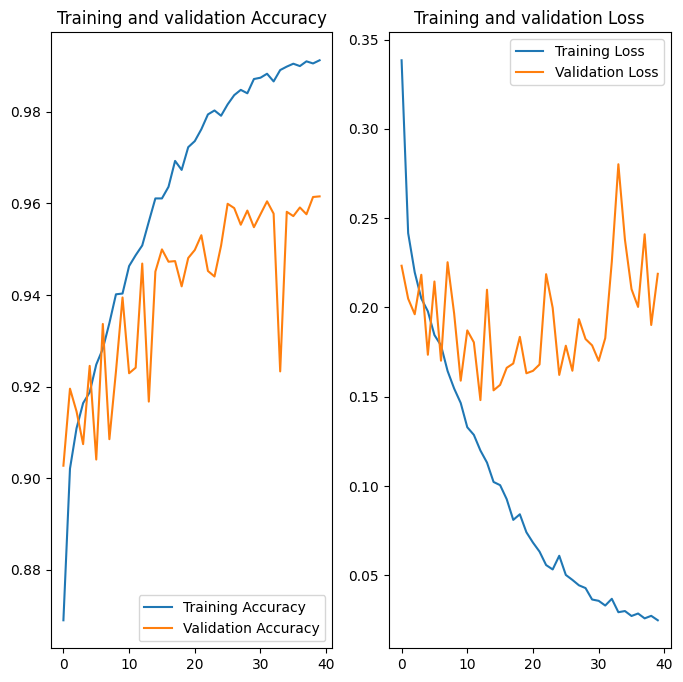

In [19]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(40),acc,label="Training Accuracy")
plt.plot(range(40),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(40),loss,label="Training Loss")
plt.plot(range(40),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and validation Loss")


233/233 [==============================] - 20s 84ms/step


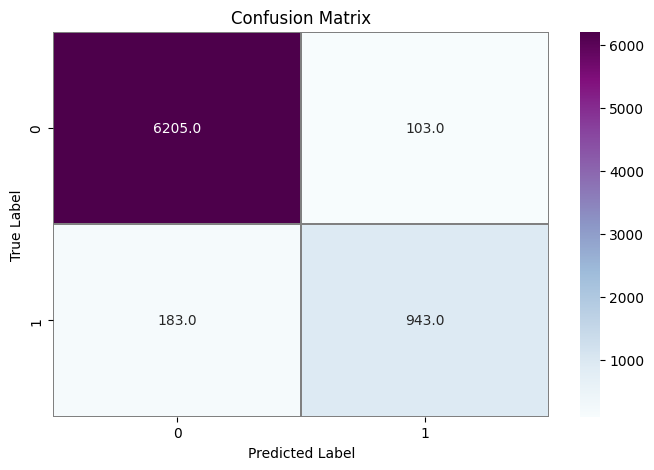

In [22]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 

confusion_mtx y)= confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [32]:
tp = 6205
fp = 103
tn = 943
fn = 183

In [34]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)*100
Precision = (tp)/(tp+fp)*100
Recall=(tp)/(tp+fn)*100
F1_score = 2*((Precision*Recall)/(Precision+Recall))*100

print("Accuracy :",Accuracy)
print("Precision :",Precision)
print("Recall :",Recall)
print("F1_score :",F1_score)

Accuracy : 96.1528114070487
Precision : 98.36715282181358
Recall : 97.13525360050093
F1_score : 9774.732199117832


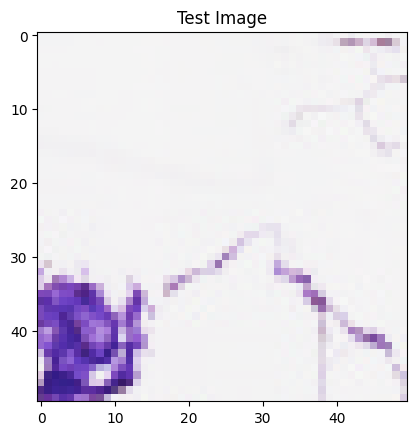

In [36]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    
index = 1150
batch = img_plot(X_test, index)

In [37]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
index = 4000
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

1/1 [==============================] - 0s 77ms/step
Predicted Value using  cnn model 1
True Value 1


In [38]:
import os 
model_version=max([int(i) for i in os.listdir("./CNN-Model-Final/")+[0]])+1
model.save(f"./CNN-Model-Final/{model_version}")

INFO:tensorflow:Assets written to: ./CNN-Model-Final/1\assets


INFO:tensorflow:Assets written to: ./CNN-Model-Final/1\assets


In [39]:
import tensorflow as tf
print(tf.__version__)

2.10.0
